In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
data = pd.read_csv("D:\DriveE\Code_files\python\\varun\data.csv")
data.head()

,month,Television-all,Rerigerator
0,January,189,201
1,February,107,157
2,March,85,196
3,April,248,303
4,May,230,308


In [ ]:
month_of_year = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December']

In [ ]:
data['month'] = data['month'].apply(lambda x: month_of_year.index(x)+1)
data

,month,Television-all,Rerigerator
0,1,189,201
1,2,107,157
2,3,85,196
3,4,248,303
4,5,230,308
5,6,225,115
6,7,286,157
7,8,305,119
8,9,118,145
9,10,139,108


In [ ]:
''' I want to use previous data of three months as well as current month for input'''

' I want to use previous data of three months as well as current month for input'

In [ ]:
data_tv = data.drop(['Rerigerator'], axis=1)

In [ ]:
temp_list = data_tv['Television-all']


In [ ]:
data_tv['prev1'] = data_tv['month'].apply(lambda x: np.nan if x-1<3 else temp_list[x-2])
data_tv['prev2'] = data_tv['month'].apply(lambda x: np.nan if x-1<3 else temp_list[x-3])
data_tv['prev3'] = data_tv['month'].apply(lambda x: np.nan if x-1<3 else temp_list[x-4])

In [ ]:
data_tv = data_tv.dropna()
data_tv

,month,Television-all,prev1,prev2,prev3
3,4,248,85.0,107.0,189.0
4,5,230,248.0,85.0,107.0
5,6,225,230.0,248.0,85.0
6,7,286,225.0,230.0,248.0
7,8,305,286.0,225.0,230.0
8,9,118,305.0,286.0,225.0
9,10,139,118.0,305.0,286.0
10,11,147,139.0,118.0,305.0
11,12,205,147.0,139.0,118.0


<AxesSubplot:>

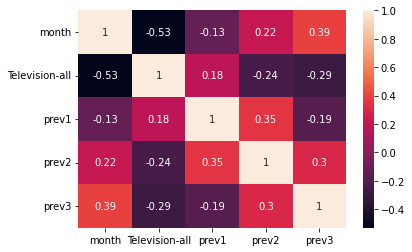

In [ ]:
corr = data_tv.corr()
sns.heatmap(corr, annot=True)

In [ ]:
xtrain = data_tv[['month','prev1', 'prev2', 'prev3']]
ytrain = data_tv['Television-all']

xtrain, ytrain

(    month  prev1  prev2  prev3
 3       4   85.0  107.0  189.0
 4       5  248.0   85.0  107.0
 5       6  230.0  248.0   85.0
 6       7  225.0  230.0  248.0
 7       8  286.0  225.0  230.0
 8       9  305.0  286.0  225.0
 9      10  118.0  305.0  286.0
 10     11  139.0  118.0  305.0
 11     12  147.0  139.0  118.0,
 3     248
 4     230
 5     225
 6     286
 7     305
 8     118
 9     139
 10    147
 11    205
 Name: Television-all, dtype: int64)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.4)
xtrain, ytrain, xtest, ytest

(    month  prev1  prev2  prev3
 10     11  139.0  118.0  305.0
 9      10  118.0  305.0  286.0
 3       4   85.0  107.0  189.0
 8       9  305.0  286.0  225.0
 7       8  286.0  225.0  230.0,
 10    147
 9     139
 3     248
 8     118
 7     305
 Name: Television-all, dtype: int64,
     month  prev1  prev2  prev3
 11     12  147.0  139.0  118.0
 4       5  248.0   85.0  107.0
 6       7  225.0  230.0  248.0
 5       6  230.0  248.0   85.0,
 11    205
 4     230
 6     286
 5     225
 Name: Television-all, dtype: int64)

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

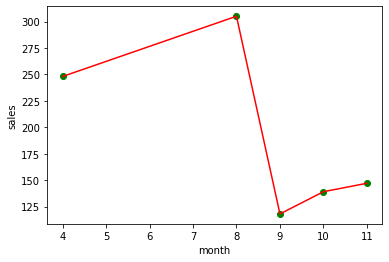

In [ ]:
plt.scatter(xtrain['month'], ytrain,color='g')
plt.plot(np.sort(xtrain['month']), model.predict(xtrain.sort_values(by="month")),color='r')

plt.xlabel('month')
plt.ylabel('sales')

plt.show()

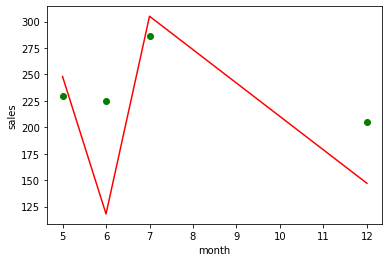

In [ ]:
plt.scatter(xtest['month'], ytest,color='g')
plt.plot(np.sort(xtest['month']), model.predict(xtest.sort_values(by="month")),color='r')

plt.xlabel('month')
plt.ylabel('sales')

plt.show()

In [ ]:
def mse(ytest, ypred):
    return np.mean((ytest-ypred)**2)

In [ ]:
def rmse(ytest, ypred):
    return np.sqrt(mse(ytest,ypred))

In [ ]:
rmse(ytest, model.predict(xtest))

62.245481763739285